### Wstęp do Uczenia Maszynowego 
##### Laboratorium 7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

### 1. Linear Discriminant Analysis (LDA)

In [19]:
Default = pd.read_csv("Default.csv")

In [20]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### Zadanie 1
-----
Przygotujmy dane do dalszej pracy:

a) zmienną objaśnianą jest `default`

b) zmiennymi objaśniającymi, których będziemy używać są `student` i `balance`

c) zamień zmienną `student` na logiczną, 1 gdy przyjmuje wartość `Yes`, 0 gdy przyjmuje wartość `No`

d) podziel dane na treningowe i testowe w proporcji 6:4 i ustaw parametr `random_state`=131124

In [21]:
Default[['student']] = Default[['student']].apply(lambda x: x.map({"No":0, "Yes":1}))

In [22]:
y = Default[['default']].apply(lambda x: x.map({"No":0, "Yes":1}))
X = Default[['student', 'balance']]

In [23]:
X

,student,balance
0,0,729.526495
1,1,817.180407
2,0,1073.549164
3,0,529.250605
4,0,785.655883
...,...,...
9995,0,711.555020
9996,0,757.962918
9997,0,845.411989
9998,0,1569.009053


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=131124)

`Default` jest to symulowany zestaw danych zawierający informacje o dziesięciu tysiącach klientów, takie jak to, czy klient nie wywiązał się ze zobowiązań, czy jest studentem, średnie saldo utrzymywane przez klienta i dochód klienta.

- Gdy klasy zmiennej odpowiedzi Y (tj. domyślnie = "Tak", domyślnie = "Nie") są dobrze rozdzielone, oszacowania parametrów dla modelu regresji logistycznej są zaskakująco niestabilne. LDA i QDA nie cierpią z powodu tego problemu.
- Jeśli n jest małe, a rozkład predyktorów X jest w przybliżeniu normalny w każdej z klas, modele LDA i QDA są ponownie bardziej stabilne niż model regresji logistycznej.
- LDA i QDA są często preferowane w stosunku do regresji logistycznej, gdy mamy więcej niż dwie klasy odpowiedzi - bez porządku (tj.: udar, przedawkowanie narkotyków i napad padaczkowy).
- Zawsze dobrze jest porównać wyniki różnych technik analitycznych; może to pomóc w potwierdzeniu wyników lub podkreślić, w jaki sposób różne założenia modelowania i charakterystyki odkrywają nowe spostrzeżenia.

### Zadanie 2
-----
Policz udział każdej z klas w zbiorze danych. Policz średnie w podgrupach: dla zmiennej `student` względem y oraz dla zmiennej `balance` względem y.

In [26]:
y.value_counts() / len(y)

default
0          0.9667
1          0.0333
Name: count, dtype: float64

In [28]:
Default.groupby(by=["default"], axis=0).agg({"student" : "mean", "balance" : "mean"})

,student,balance
default,,
No,0.291404,803.94375
Yes,0.381381,1747.82169


### Zadanie 3
-----
Przygotuj model `LinearDiscriminantAnalysis` dla zbioru treningowego.

In [35]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [36]:
y_pred = lda.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3865
           1       0.78      0.24      0.36       135

    accuracy                           0.97      4000
   macro avg       0.88      0.62      0.67      4000
weighted avg       0.97      0.97      0.96      4000



In [38]:
lda.priors_

array([0.967, 0.033])

In [ ]:
lda.means_

array([[2.89382971e-01, 8.05969052e+02],
       [4.14141414e-01, 1.76066277e+03]])

In [48]:
lda.coef_

array([[-0.33234161,  0.00473073]])

In [41]:
lda.intercept_

array([-9.33180201])

### Zadanie 4
-----
Na podstawie wyliczonych współczynników oblicz funkcję decyzyją dla obserwacji ze zbioru treningowego. Rezultaty przedstaw na wykresie w podziale na wartości zmiennej `y`.

In [60]:
decision_yes = lda.coef_[0][0] * X_train[y_train['default'] == 1]['student'] + lda.coef_[0][1] * X_train[y_train['default'] == 1]['balance'] + lda.intercept_[0]
decision_no = lda.coef_[0][0] * X_train[y_train['default'] == 0]['student'] + lda.coef_[0][1] * X_train[y_train['default'] == 0]['balance'] + lda.intercept_[0]

In [61]:
decision_yes

2126   -2.601342
6075    2.084952
6249   -2.590835
6601    0.594215
7014   -0.704418
          ...   
867    -2.208125
3189    1.210490
1395   -1.013194
1023   -2.924943
9369   -0.744710
Length: 198, dtype: float64

(array([ 1.,  6.,  7., 17., 34., 36., 46., 34., 13.,  4.]),
 array([-6.02707109, -5.17097523, -4.31487937, -3.45878351, -2.60268765,
        -1.74659178, -0.89049592, -0.03440006,  0.8216958 ,  1.67779166,
         2.53388752]),
 <BarContainer object of 10 artists>)

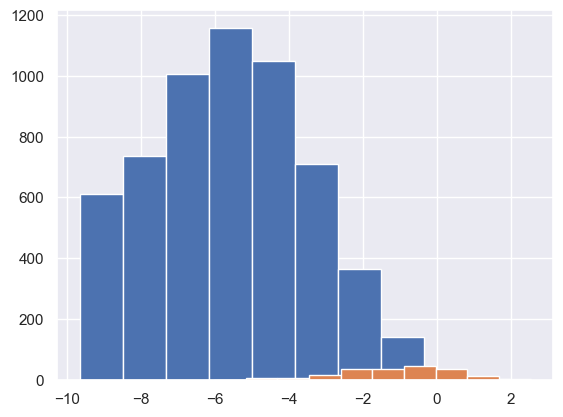

In [65]:
plt.figure()
plt.hist(decision_no)
plt.hist(decision_yes)

### Zadanie 5
-----
Wyznacz macierz pomyłek dla modelu `LDA`.

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
y_pred = lda.predict(X_test)

<Axes: >

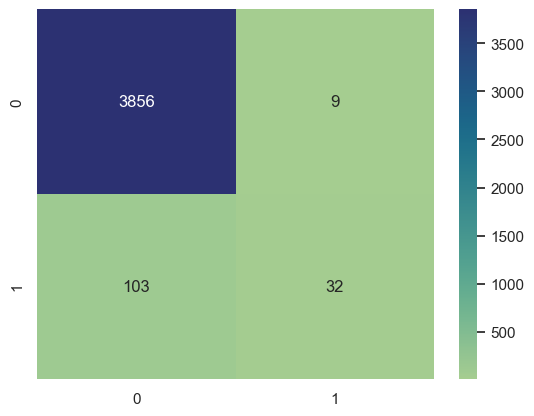

In [74]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='crest', annot=True, fmt='.0f')

#### ** Niezbalansowane dane - jaką miarą mierzyć jakość modeli?
https://miroslawmamczur.pl/niezbalansowane-dane/

https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

### Zadanie 6
-----
Weźmy pod uwagę zbiór danych `earthquake.txt`. Przygotuj model LDA. Wyznacz wartości `decision_function()` i narysuj wykres w podziale na klasy zmiennej `y`. Wyznacz macierz pomyłek.

In [75]:
earthquake = pd.read_csv('earthquake.txt', sep = " ")

In [76]:
earthquake.head()

,popn,body,surface
0,equake,5.60,4.25
1,equake,5.18,3.93
2,equake,6.31,6.30
3,equake,5.36,4.49
4,equake,5.96,6.39


In [77]:
X = earthquake.drop('popn', axis=1)
y = earthquake['popn']

In [78]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

(array([2., 1., 1., 1., 3., 0., 0., 0., 0., 1.]),
 array([ 2.99282817,  3.94428339,  4.89573861,  5.84719383,  6.79864905,
         7.75010427,  8.70155949,  9.65301471, 10.60446993, 11.55592516,
        12.50738038]),
 <BarContainer object of 10 artists>)

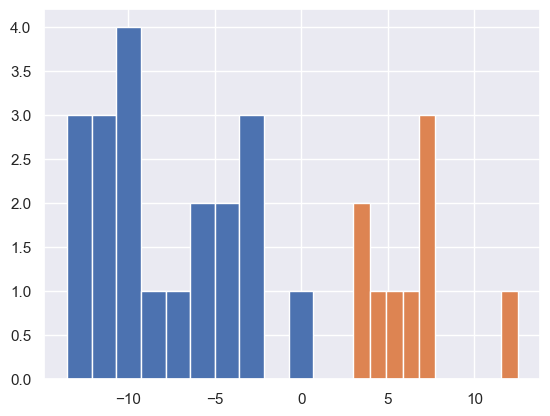

In [81]:
plt.figure()
plt.hist(lda.decision_function(X[y == 'equake']))
plt.hist(lda.decision_function(X[y != 'equake']))

In [82]:
print(classification_report(y, lda.predict(X)))

              precision    recall  f1-score   support

      equake       1.00      0.95      0.97        20
     explosn       0.90      1.00      0.95         9

    accuracy                           0.97        29
   macro avg       0.95      0.97      0.96        29
weighted avg       0.97      0.97      0.97        29



### 2. Quadratic Discriminant Analysis (QDA)

### Zadanie 7
-----
Przygotuj dla danych z Zadania 6 model QDA. Wyznacz wartości `decision_function()` i narysuj wykres w podziale na klasy zmiennej `y`. Wyznacz macierz pomyłek.

#### *** Linear and Quadratic Discriminant Analysis with covariance ellipsoid
Na podstawie: https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

cmap = colors.LinearSegmentedColormap(
    "red_blue_classes_new",
    {
        "red": [(0, 1, 1), (1, 0.7, 0.7)],
        "green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        "blue": [(0, 0.7, 0.7), (1, 1, 1)],
    },
)
plt.cm.register_cmap(cmap=cmap)

In [ ]:
from scipy import linalg


def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(1, 2, fig_index)
   
    tp = y == y_pred  # True Positive
    tp0, tp1 = tp[y == 'equake'], tp[y == 'explosn'] #tutaj należy pamiętać o zmianie
    X0, X1 = X[y == 'equake'], X[y == 'explosn'] # tutaj należy pamiętać o zmianie
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp["body"], X0_tp["surface"], marker=".", color="red")
    plt.scatter(X0_fp["body"], X0_fp["surface"], marker="x", s=20, color="#990000")  # dark red

    # class 1: dots
    plt.scatter(X1_tp["body"], X1_tp["surface"], marker=".", color="blue")
    plt.scatter(X1_fp["body"], X1_fp["surface"], marker="x", s=20, color="#000099")  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(
        xx, yy, Z, cmap="red_blue_classes_new", norm=colors.Normalize(0.0, 1.0), zorder=0
    )
    plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")

    # means
    plt.plot(
        lda.means_[0][0],
        lda.means_[0][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )
    plt.plot(
        lda.means_[1][0],
        lda.means_[1][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        angle=180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, "red")
    plot_ellipse(splot, lda.means_[1], lda.covariance_, "blue")


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], "red")
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], "blue")

In [ ]:
plt.figure(figsize=(10, 5), facecolor="white")
plt.suptitle(
    "Linear Discriminant Analysis vs Quadratic Discriminant Analysis",
    y=0.98,
    fontsize=15,
)

from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)


# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)
splot = plot_data(lda, X, y, y_pred, fig_index=1)
plot_lda_cov(lda, splot)
plt.axis("tight")

# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X, y).predict(X)
splot = plot_data(qda, X, y, y_pred, fig_index=2)
plot_qda_cov(qda, splot)
plt.axis("tight")

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()